<a href="https://colab.research.google.com/github/RoseSarlake/spectral-image/blob/main/Read_VIS_and_IR_paintings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
####### Read raw file 
def readDir(dir_path):
    myDir = os.listdir(dir_path)
    dark_hdr =[]
    dark_raw=[]
    white_hdr=[]
    white_raw=[]
    for file in myDir:
        if 'dark' in file.lower() and 'hdr' in file.lower():
            #dark_hdr = dir_path + '/' + file
            dark_hdr = os.path.join(dir_path, file)
        if 'dark' in file.lower() and 'raw' in file.lower():
            #dark_raw = dir_path + '/' + file
            dark_raw = os.path.join(dir_path, file)
        if 'white' in file.lower() and 'hdr' in file.lower():
            #white_hdr = dir_path + '/' + file
            white_hdr = os.path.join(dir_path, file)
        if 'white' in file.lower() and 'raw' in file.lower():
            #white_raw = dir_path + '/' + file
            white_raw = os.path.join(dir_path, file)
        if (not 'white' in file.lower()) and (not 'dark' in file.lower()) and 'hdr' in file.lower():
            #object_hdr = dir_path + '/' + file
            object_hdr = os.path.join(dir_path, file)
        if (not 'white' in file.lower()) and (not 'dark' in file.lower()) and 'raw' in file.lower():
            #object_raw = dir_path + '/' + file
            object_raw = os.path.join(dir_path, file)
    return object_raw, object_hdr, white_raw, white_hdr, dark_raw, dark_hdr  

##### Read HDR content
def read_hdr(hdr_path):
    f=open(hdr_path, "r")
    filelines = f.readlines()
    #print(filelines)
    f.close()
    bands = ''
    for fileline in filelines:
        #print(fileline)
        if 'samples' in fileline.lower():
            samples = int(fileline.replace('samples = ',''))
            #print(samples)
        if bands =='' and 'bands' in fileline.lower():
            bands = int(fileline.replace('bands = ',''))
        if 'lines' in fileline.lower():
            lines = int(fileline.replace('lines = ',''))
    # read waves   
    print(samples, bands, lines)
    n = 0
    for fileline in filelines:
        if 'th = {' in fileline.lower():
          #print(n)
          n1 = n+1
        n = n + 1
    n2 = n1 + bands
    waves = np.zeros(n2-n1,)
    n = 0
    for i in range(n1, n2):
        #print(filelines[i])
        waves[n] = float(filelines[i].replace(',',''))
        #print(waves[n])
        n = n + 1
    
    return samples, bands, lines, waves     

In [3]:
path = '/content/drive/MyDrive/ASI/savedata/paintings_Madonna_with_two_0015/capture'
[vis_raw, vis_hdr, white_raw, white_hdr, dark_raw, dark_hdr ] = readDir(path)
[samples, bands, lines, waves] = read_hdr(vis_hdr)

2144 540 2253


In [4]:
# read only part of the cube
fopen = open(vis_raw, "rb")
line_start = 100
fopen.seek(samples*bands*line_start*2) # we skip 'line_start' number of lines
line_read = 1000
raw_part = np.fromfile(fopen, dtype=np.uint16, count=samples*bands*line_read) # we read only 'line_read' number of lines
print('samples*bands*line_read =',samples*bands*line_read)
print('raw_part.shape =', raw_part.shape)
[s1] = raw_part.shape
print(samples*bands*line_read/s1)
cube_part = np.reshape(raw_part, (line_read, bands, samples))

samples*bands*line_read = 1157760000
raw_part.shape = (1157760000,)
1.0


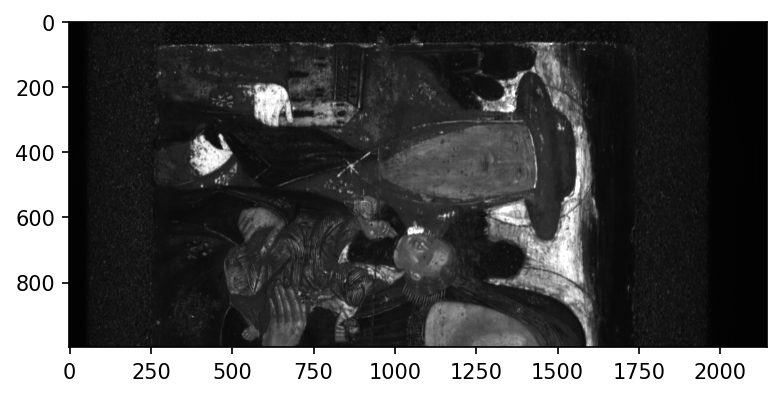

In [5]:
plt.rcParams['figure.dpi'] = 150
plt.imshow(cube_part[:,200,:], cmap="gray", vmin=0, vmax=13000)#
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


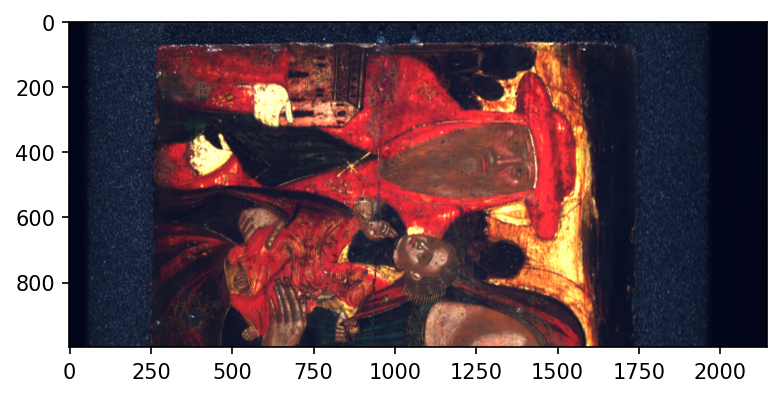

In [6]:
# Generate RGB preview
RGB = np.empty((line_read, samples, 3)) # Create a 'bmp' array with spatial size of ENVI 512,512 with 3 layers
# We go to hdr file and select channels
ch_1 = 250 # Wavelength 630.95nm
ch_2 = 171 # Wavelength 531.59nm
ch_3 = 100 # Wavelength 443.68nm
RGB[:,:,0] = 2*cube_part[:,ch_1,:]/np.amax(cube_part[:,ch_1,:]) # np.amax gets max value. Thus we get RGB in range [0,1]
RGB[:,:,1] = 2*cube_part[:,ch_2,:]/np.amax(cube_part[:,ch_2,:])
RGB[:,:,2] = 2*cube_part[:,ch_3,:]/np.amax(cube_part[:,ch_3,:])
plt.rcParams['figure.dpi'] = 150
plt.imshow(RGB)
plt.show()

In [7]:
# Read wavelengths from hdr file
f=open(vis_hdr, "r")
filelines = f.readlines()
#print(filelines)
f.close()
n_waves = 540
waves = np.zeros(n_waves,)
n = 0
for i in range(55, 55+n_waves):
  #print(filelines[i])
  waves[n] = float(filelines[i].replace(',',''))
  print(f"{i} ：{waves[n]}nm")
  n = n + 1
#print(waves)   

55 ：322.06nm
56 ：323.27nm
57 ：324.47nm
58 ：325.68nm
59 ：326.88nm
60 ：328.08nm
61 ：329.29nm
62 ：330.49nm
63 ：331.7nm
64 ：332.9nm
65 ：334.11nm
66 ：335.31nm
67 ：336.52nm
68 ：337.73nm
69 ：338.93nm
70 ：340.14nm
71 ：341.35nm
72 ：342.56nm
73 ：343.76nm
74 ：344.97nm
75 ：346.18nm
76 ：347.39nm
77 ：348.6nm
78 ：349.81nm
79 ：351.01nm
80 ：352.22nm
81 ：353.43nm
82 ：354.64nm
83 ：355.85nm
84 ：357.07nm
85 ：358.28nm
86 ：359.49nm
87 ：360.7nm
88 ：361.91nm
89 ：363.12nm
90 ：364.33nm
91 ：365.55nm
92 ：366.76nm
93 ：367.97nm
94 ：369.18nm
95 ：370.4nm
96 ：371.61nm
97 ：372.83nm
98 ：374.04nm
99 ：375.25nm
100 ：376.47nm
101 ：377.68nm
102 ：378.9nm
103 ：380.11nm
104 ：381.33nm
105 ：382.55nm
106 ：383.76nm
107 ：384.98nm
108 ：386.2nm
109 ：387.41nm
110 ：388.63nm
111 ：389.85nm
112 ：391.07nm
113 ：392.28nm
114 ：393.5nm
115 ：394.72nm
116 ：395.94nm
117 ：397.16nm
118 ：398.38nm
119 ：399.6nm
120 ：400.82nm
121 ：402.04nm
122 ：403.26nm
123 ：404.48nm
124 ：405.7nm
125 ：406.92nm
126 ：408.14nm
127 ：409.36nm
128 ：410.59nm
129 ：411.81nm
130 ：

In [8]:
print(waves.shape)

(540,)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


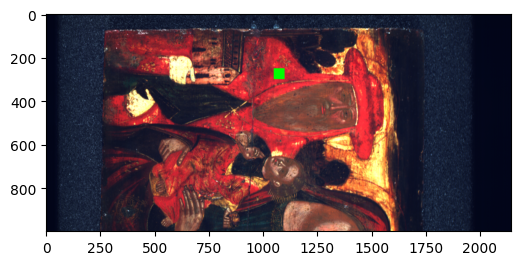

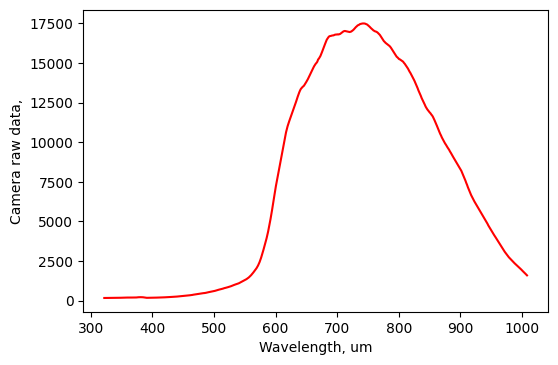

In [9]:
#Select an areay
RGB2 = RGB.copy()
spectral_image = cube_part.copy()
##################################################################
# Select Red
x1 = 1050
x2 = 1100
y1 = 250
y2 = 300
RGB2[y1:y2,x1:x2,0] = 0
RGB2[y1:y2,x1:x2,1] = 1
RGB2[y1:y2,x1:x2,2] = 0
sel = spectral_image[y1:y2,:,x1:x2]
sel1 = np.sum(sel, axis = 0)
red = np.sum(sel1, axis =1)/((x2-x1)*(y2-y1))
##################################################################
plt.rcParams['figure.dpi'] = 100
plt.imshow(RGB2)
plt.show()

plt.plot(waves, red, "r")

plt.xlabel('Wavelength, um')
plt.ylabel('Camera raw data,')
#plt.ylabel('Reflectance [0-100]%')
plt.show()

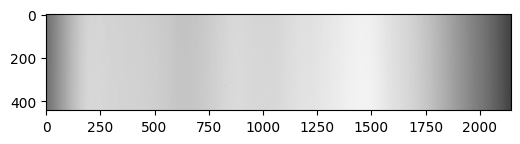

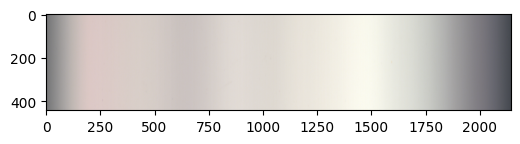

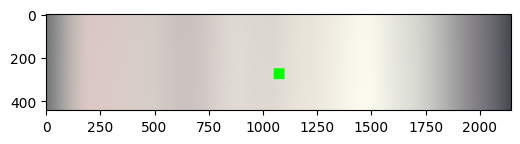

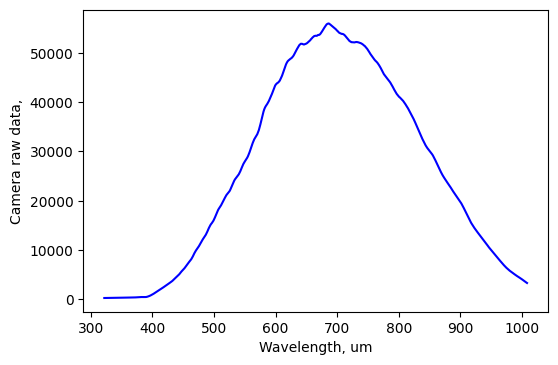

In [10]:
import numpy as np
# read white
samples = 2144
bands = 540
lines = 442
fopen = open(white_raw, "rb")
raw_white = np.fromfile(fopen, dtype=np.uint16) # we read only 'line_read' number of lines
white = np.reshape(raw_white, (lines, bands, samples))
white_preview = white[:,300,:]
plt.imshow(white_preview, cmap="gray", vmin=0, vmax=65000) 
plt.show()
# Generate RGB preview
RGBW = np.empty((lines, samples, 3)) # Create a 'bmp' array with spatial size of ENVI 512,512 with 3 layers
# We go to hdr file and select channels
ch_1 = 283 # Wavelength 631.15
ch_2 = 183 # Wavelength 528.03
ch_3 = 83 # Wavelength 443.56
RGBW[:,:,0] = white[:,ch_1,:]/np.amax(white[:,ch_1,:]) # np.amax gets max value. Thus we get RGB in range [0,1]
RGBW[:,:,1] = white[:,ch_2,:]/np.amax(white[:,ch_2,:])
RGBW[:,:,2] = white[:,ch_3,:]/np.amax(white[:,ch_3,:])
plt.rcParams['figure.dpi'] = 100
plt.imshow(RGBW)
plt.show()
#Select an areay
RGBW2 = RGBW.copy()
spectral_image = white.copy()
##################################################################
# Select Red
x1 = 1050
x2 = 1100
y1 = 250
y2 = 300
RGBW2[y1:y2,x1:x2,0] = 0
RGBW2[y1:y2,x1:x2,1] = 1
RGBW2[y1:y2,x1:x2,2] = 0
sel = spectral_image[y1:y2,:,x1:x2]
sel1 = np.sum(sel, axis = 0)
white_s = np.sum(sel1, axis =1)/((x2-x1)*(y2-y1))
##################################################################
plt.rcParams['figure.dpi'] = 100
plt.imshow(RGBW2)
plt.show()

plt.plot(waves, white_s, "b")

plt.xlabel('Wavelength, um')
plt.ylabel('Camera raw data,')
#plt.ylabel('Reflectance [0-100]%')
plt.show()

2144 540 100


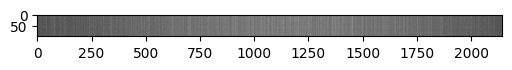

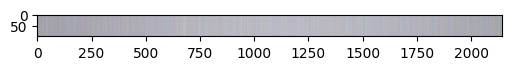

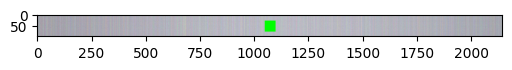

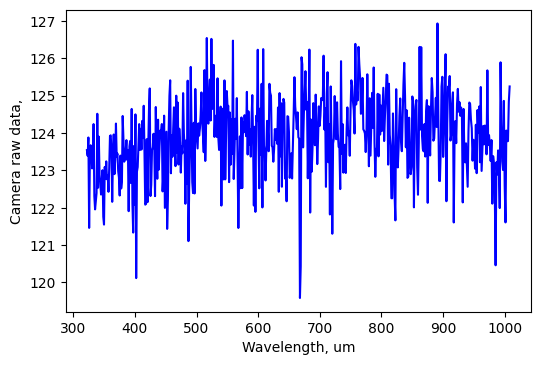

In [27]:
###############################################
# Read Dark
import numpy as np
[samples, bands, lines, waves] = read_hdr(dark_hdr)
fopen = open(dark_raw, "rb")
raw_dark = np.fromfile(fopen, dtype=np.uint16) # we read only 'line_read' number of lines
dark = np.reshape(raw_dark, (lines, bands, samples))
dark_preview = dark[:,300,:]
plt.imshow(dark_preview, cmap="gray") 
plt.show()
#####################
# Generate RGB preview
RGBD = np.empty((lines, samples, 3)) # Create a 'bmp' array with spatial size of ENVI 512,512 with 3 layers
# We go to hdr file and select channels
ch_1 = 283 # Wavelength 631.15
ch_2 = 183 # Wavelength 528.03
ch_3 = 83 # Wavelength 443.56
RGBD[:,:,0] = dark[:,ch_1,:]/np.amax(dark[:,ch_1,:]) # np.amax gets max value. Thus we get RGB in range [0,1]
RGBD[:,:,1] = dark[:,ch_2,:]/np.amax(dark[:,ch_2,:])
RGBD[:,:,2] = dark[:,ch_3,:]/np.amax(dark[:,ch_3,:])
plt.rcParams['figure.dpi'] = 100
plt.imshow(RGBD)
plt.show()
RGBD2 = RGBD.copy()
spectral_image = dark.copy()
##################################################################
# Select Red
x1 = 1050
x2 = 1100
y1 = 30
y2 = 80
RGBD2[y1:y2,x1:x2,0] = 0
RGBD2[y1:y2,x1:x2,1] = 1
RGBD2[y1:y2,x1:x2,2] = 0
sel = spectral_image[y1:y2,:,x1:x2]
sel1 = np.sum(sel, axis = 0)
dark_s = np.sum(sel1, axis =1)/((x2-x1)*(y2-y1))
##################################################################
plt.rcParams['figure.dpi'] = 100
plt.imshow(RGBD2)
plt.show()

plt.plot(waves, dark_s, "b")

plt.xlabel('Wavelength, um')
plt.ylabel('Camera raw data,')
#plt.ylabel('Reflectance [0-100]%')
plt.show()

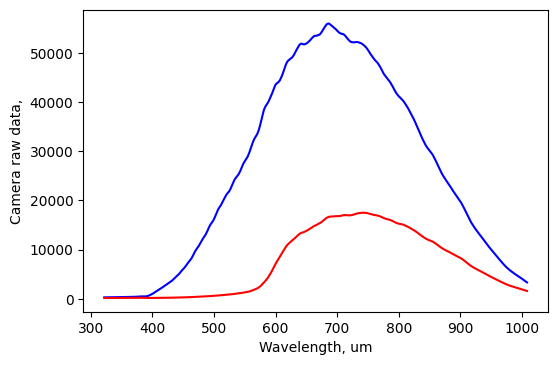

In [28]:
plt.plot(waves, white_s, "b")
plt.plot(waves, red, "r")

plt.xlabel('Wavelength, um')
plt.ylabel('Camera raw data,')
#plt.ylabel('Reflectance [0-100]%')
plt.show()

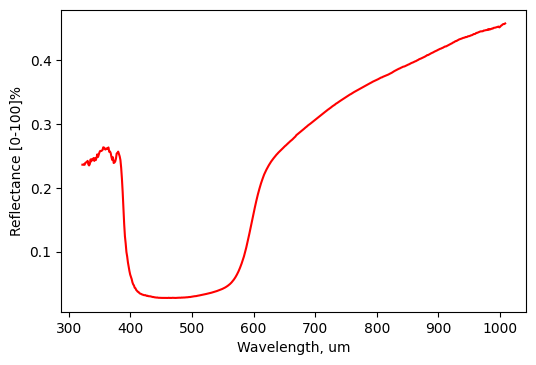

In [29]:
red_corrected = (red-dark_s)/(white_s-dark_s)
plt.plot(waves, red_corrected, "r")

plt.xlabel('Wavelength, um')
plt.ylabel('Reflectance [0-100]%')
plt.show()

320 256 943


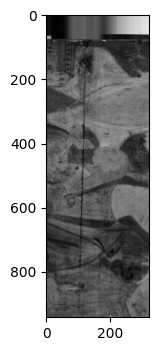

In [30]:
# read IR
path = '/content/drive/MyDrive/ASI/savedata/IR_IR1_0019/capture'
[IR_raw, IR_hdr, white_raw_IR, white_hdr_IR, dark_raw_IR, dark_hdr_IR] = readDir(path)
[samples, bands, lines, wavesIR] = read_hdr(IR_hdr)
fopen = open(IR_raw, "rb")
raw = np.fromfile(fopen, dtype=np.uint16) # we read only 'line_read' number of lines
IR_cube = np.reshape(raw, (lines, bands, samples))
plt.imshow(IR_cube[:,100,:],cmap="gray") 
plt.show()

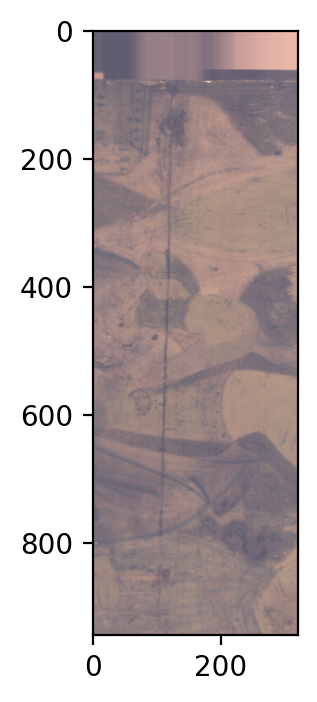

In [31]:
# Generate RGB preview
RGBIR = np.empty((lines, samples, 3)) # Create a 'bmp' array with spatial size of ENVI 512,512 with 3 layers
# We go to hdr file and select channels
ch_1 = 100 # Wavelength 631.15
ch_2 = 150 # Wavelength 528.03
ch_3 = 200 # Wavelength 443.56
RGBIR[:,:,0] = IR_cube[:,ch_1,:]/np.amax(IR_cube[:,ch_1,:]) # np.amax gets max value. Thus we get RGB in range [0,1]
RGBIR[:,:,1] = IR_cube[:,ch_2,:]/np.amax(IR_cube[:,ch_2,:])
RGBIR[:,:,2] = IR_cube[:,ch_3,:]/np.amax(IR_cube[:,ch_3,:])
plt.rcParams['figure.dpi'] = 200
plt.imshow(RGBIR)
plt.show()

In [32]:
# Read wavelengths from hdr file
f=open(IR_hdr, "r")
filelines = f.readlines()
#print(filelines)
f.close()
n_waves = 256
wavesIR = np.zeros(n_waves,)
n = 0
for i in range(46, 46+n_waves):
  #print(filelines[i])
  wavesIR[n] = float(filelines[i].replace(',',''))
  #print(waves[n])
  n = n + 1
print(wavesIR)   

[ 918.91  925.31  931.72  938.13  944.53  950.93  957.33  963.73  970.12
  976.52  982.91  989.3   995.69 1002.08 1008.47 1014.85 1021.24 1027.62
 1034.   1040.38 1046.76 1053.14 1059.51 1065.89 1072.26 1078.63 1085.
 1091.37 1097.74 1104.11 1110.47 1116.83 1123.2  1129.56 1135.92 1142.28
 1148.63 1154.99 1161.34 1167.7  1174.05 1180.4  1186.75 1193.1  1199.45
 1205.8  1212.14 1218.49 1224.83 1231.17 1237.51 1243.85 1250.19 1256.53
 1262.87 1269.21 1275.54 1281.87 1288.21 1294.54 1300.87 1307.2  1313.53
 1319.86 1326.19 1332.52 1338.84 1345.17 1351.49 1357.81 1364.14 1370.46
 1376.78 1383.1  1389.42 1395.74 1402.06 1408.37 1414.69 1421.01 1427.32
 1433.64 1439.95 1446.26 1452.58 1458.89 1465.2  1471.51 1477.82 1484.13
 1490.44 1496.75 1503.06 1509.36 1515.67 1521.98 1528.28 1534.59 1540.89
 1547.2  1553.5  1559.8  1566.11 1572.41 1578.71 1585.01 1591.31 1597.61
 1603.91 1610.21 1616.51 1622.81 1629.11 1635.41 1641.71 1648.01 1654.31
 1660.61 1666.9  1673.2  1679.5  1685.79 1692.09 1698

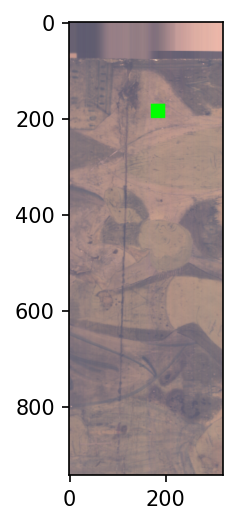

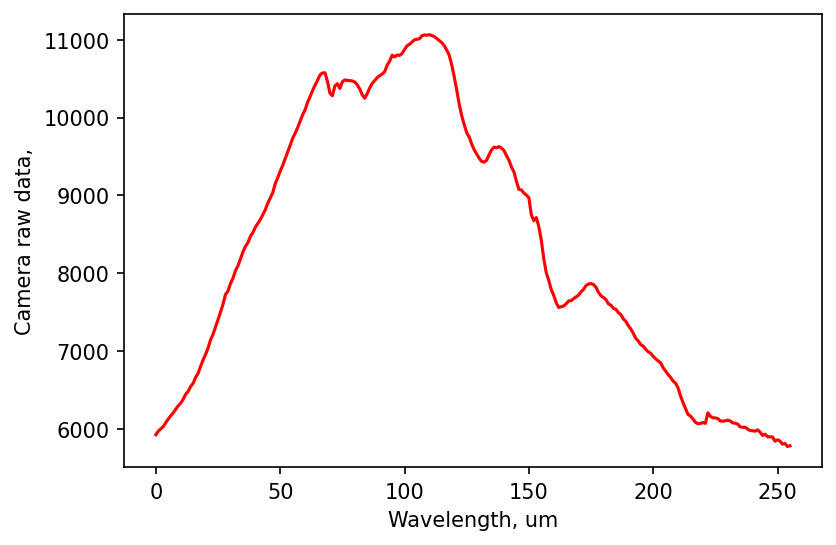

In [33]:
#Select an areay
RGBIR2 = RGBIR.copy()
spectral_image = cube_part.copy()
##################################################################
# Select Red
x1 = 170
x2 = 200
y1 = 170
y2 = 200
RGBIR2[y1:y2,x1:x2,0] = 0
RGBIR2[y1:y2,x1:x2,1] = 1
RGBIR2[y1:y2,x1:x2,2] = 0
sel = IR_cube[y1:y2,:,x1:x2]
sel1 = np.sum(sel, axis = 0)
redIR = np.sum(sel1, axis =1)/((x2-x1)*(y2-y1))
##################################################################
plt.rcParams['figure.dpi'] = 150
plt.imshow(RGBIR2)
plt.show()

plt.plot(redIR, "r")

plt.xlabel('Wavelength, um')
plt.ylabel('Camera raw data,')
#plt.ylabel('Reflectance [0-100]%')
plt.show()

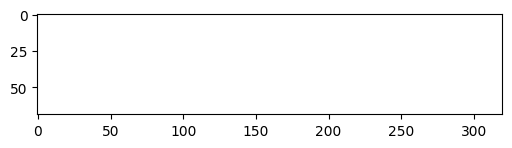

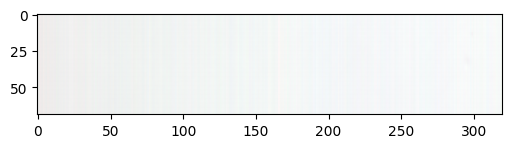

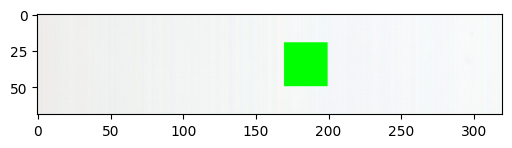

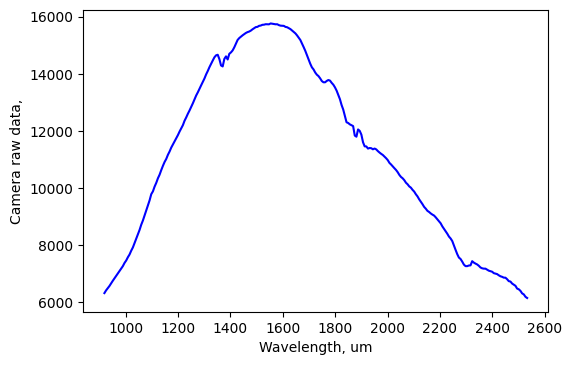

In [34]:
# read white
fopen = open(white_raw_IR, "rb")
samples = 320
bands = 256
lines = 69
raw_white_IR = np.fromfile(fopen, dtype=np.uint16) # we read only 'line_read' number of lines
whiteIR = np.reshape(raw_white_IR, (lines, bands, samples))
white_previewIR = whiteIR[:,100,:]
plt.rcParams['figure.dpi'] = 100
plt.imshow(white_previewIR, cmap="gray", vmin=0, vmax=13000) 
plt.show()
###############
# Generate RGB preview
RGBWIR = np.empty((lines, samples, 3)) # Create a 'bmp' array with spatial size of ENVI 512,512 with 3 layers
# We go to hdr file and select channels
ch_1 = 200 # Wavelength 631.15
ch_2 = 130 # Wavelength 528.03
ch_3 = 40 # Wavelength 443.56
RGBWIR[:,:,0] = whiteIR[:,ch_1,:]/np.amax(whiteIR[:,ch_1,:]) # np.amax gets max value. Thus we get RGB in range [0,1]
RGBWIR[:,:,1] = whiteIR[:,ch_2,:]/np.amax(whiteIR[:,ch_2,:])
RGBWIR[:,:,2] = whiteIR[:,ch_3,:]/np.amax(whiteIR[:,ch_3,:])
plt.rcParams['figure.dpi'] = 100
plt.imshow(RGBWIR)
plt.show()
#Select an areay
RGBWIR2 = RGBWIR.copy()
spectral_image = whiteIR.copy()
##################################################################
# Select Red
x1 = 170
x2 = 200
y1 = 20
y2 = 50
RGBWIR2[y1:y2,x1:x2,0] = 0
RGBWIR2[y1:y2,x1:x2,1] = 1
RGBWIR2[y1:y2,x1:x2,2] = 0
sel = spectral_image[y1:y2,:,x1:x2]
sel1 = np.sum(sel, axis = 0)
white_sIR = np.sum(sel1, axis =1)/((x2-x1)*(y2-y1))
##################################################################
plt.rcParams['figure.dpi'] = 100
plt.imshow(RGBWIR2)
plt.show()

plt.plot(wavesIR, white_sIR, "b")

plt.xlabel('Wavelength, um')
plt.ylabel('Camera raw data,')
#plt.ylabel('Reflectance [0-100]%')
plt.show()

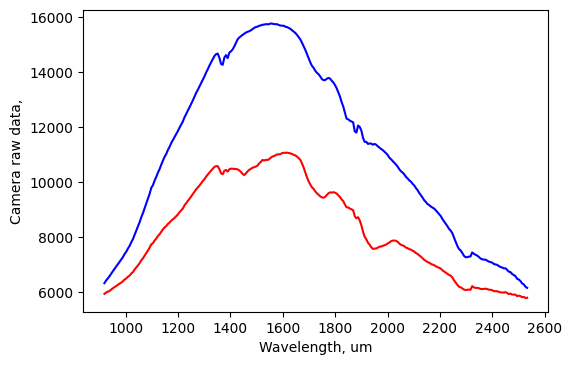

In [19]:
plt.plot(wavesIR, white_sIR, "b")
plt.plot(wavesIR, redIR, "r")

plt.xlabel('Wavelength, um')
plt.ylabel('Camera raw data,')
#plt.ylabel('Reflectance [0-100]%')
plt.show()

320 256 100


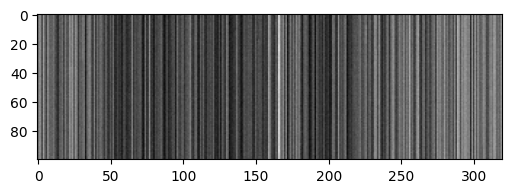

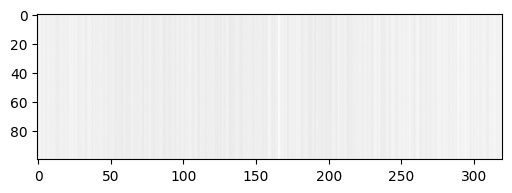

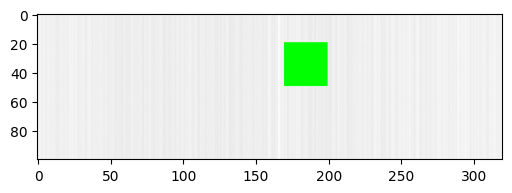

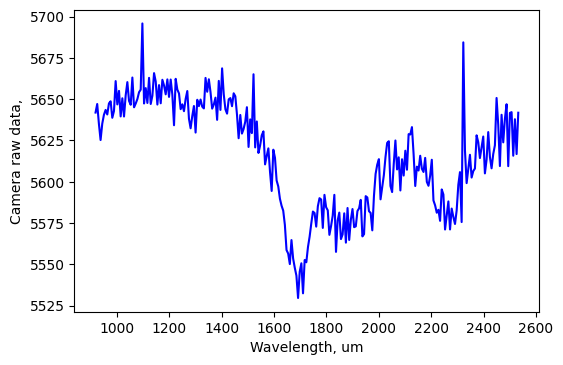

In [35]:
###############################################
# Read Dark
import numpy as np
[samples, bands, lines, wavesIR] = read_hdr(dark_hdr_IR)
fopen = open(dark_raw_IR, "rb")
raw_dark = np.fromfile(fopen, dtype=np.uint16) # we read only 'line_read' number of lines
dark_IR = np.reshape(raw_dark, (lines, bands, samples))
dark_preview = dark_IR[:,200,:]
plt.imshow(dark_preview, cmap="gray") 
plt.show()
#####################
# Generate RGB preview
RGBD_IR = np.empty((lines, samples, 3)) # Create a 'bmp' array with spatial size of ENVI 512,512 with 3 layers
# We go to hdr file and select channels
ch_1 = 200 # Wavelength 631.15
ch_2 = 200 # Wavelength 528.03
ch_3 = 200 # Wavelength 443.56
RGBD_IR[:,:,0] = dark_IR[:,ch_1,:]/np.amax(dark_IR[:,ch_1,:]) # np.amax gets max value. Thus we get RGB in range [0,1]
RGBD_IR[:,:,1] = dark_IR[:,ch_2,:]/np.amax(dark_IR[:,ch_2,:])
RGBD_IR[:,:,2] = dark_IR[:,ch_3,:]/np.amax(dark_IR[:,ch_3,:])
plt.rcParams['figure.dpi'] = 100
plt.imshow(RGBD_IR)
plt.show()
RGBD2_IR = RGBD_IR.copy()
spectral_image = dark_IR.copy()
##################################################################
# Select Red
x1 = 170
x2 = 200
y1 = 20
y2 = 50
RGBD2_IR[y1:y2,x1:x2,0] = 0
RGBD2_IR[y1:y2,x1:x2,1] = 1
RGBD2_IR[y1:y2,x1:x2,2] = 0
sel = spectral_image[y1:y2,:,x1:x2]
sel1 = np.sum(sel, axis = 0)
dark_sIR = np.sum(sel1, axis =1)/((x2-x1)*(y2-y1))
##################################################################
plt.rcParams['figure.dpi'] = 100
plt.imshow(RGBD2_IR)
plt.show()

plt.plot(wavesIR, dark_sIR, "b")

plt.xlabel('Wavelength, um')
plt.ylabel('Camera raw data,')
#plt.ylabel('Reflectance [0-100]%')
plt.show()

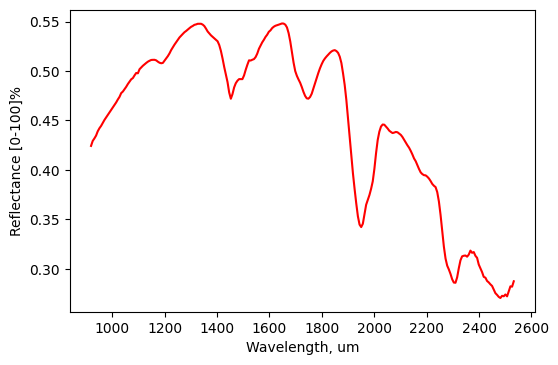

In [36]:
red_correctedIR = (redIR-dark_sIR)/(white_sIR-dark_sIR)
plt.plot(wavesIR, red_correctedIR, "r")

plt.xlabel('Wavelength, um')
plt.ylabel('Reflectance [0-100]%')
plt.show()

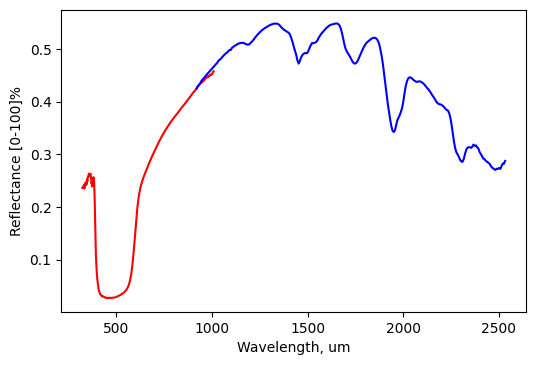

In [37]:
plt.plot(waves, red_corrected, "r")
plt.plot(wavesIR, red_correctedIR, "b")
plt.xlabel('Wavelength, um')
plt.ylabel('Reflectance [0-100]%')
plt.show()